In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
# Load the dataset
file_path = 'Titanic-Dataset.csv'
data = pd.read_csv(file_path)

In [5]:
# Display the first few rows of the dataset
print("Dataset preview:")
print(data.head())

Dataset preview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

In [6]:
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

<ipython-input-7-449c3cf55d7d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-7-449c3cf55d7d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [8]:
# Drop the 'Cabin' column due to many missing values
data.drop('Cabin', axis=1, inplace=True)

In [9]:
# Encode categorical features
encoder = LabelEncoder()
data['Sex'] = encoder.fit_transform(data['Sex'])
data['Embarked'] = encoder.fit_transform(data['Embarked'])

<ipython-input-10-b3773eca6299>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Survived', palette='pastel')


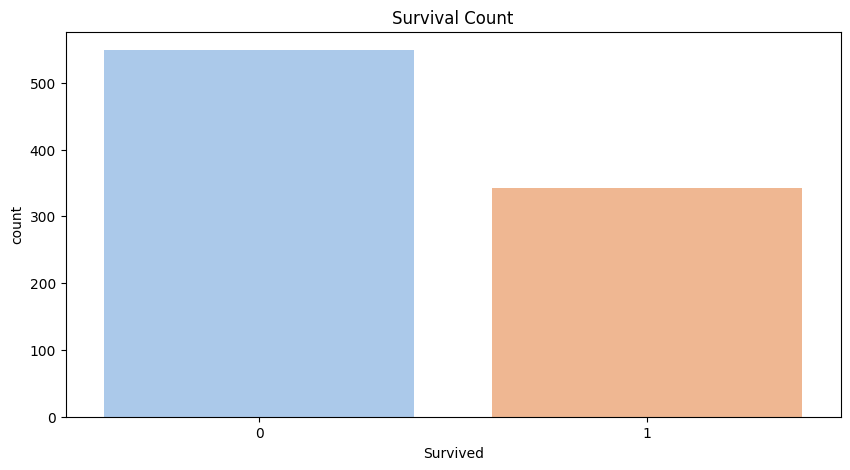

In [10]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Survived', palette='pastel')
plt.title("Survival Count")
plt.show()

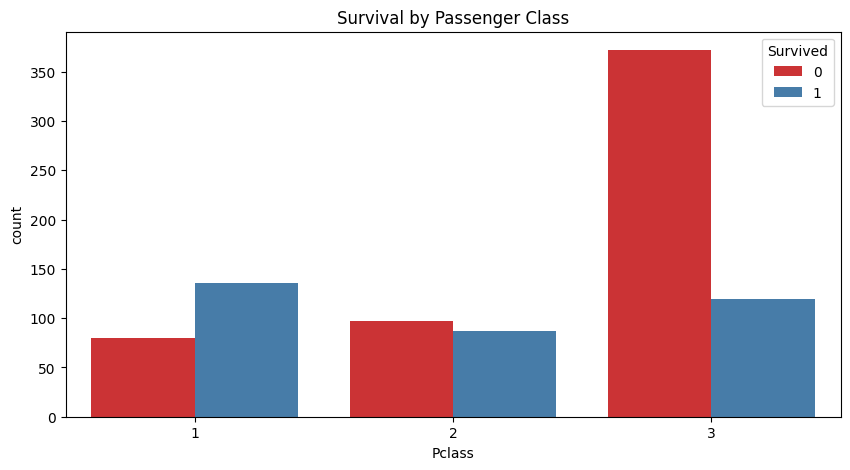

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Pclass', hue='Survived', palette='Set1')
plt.title("Survival by Passenger Class")
plt.show()

In [12]:
# Feature Selection
X = data.drop(['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
y = data['Survived']

In [13]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Build a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Predict on test data
y_pred = model.predict(X_test)


In [16]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



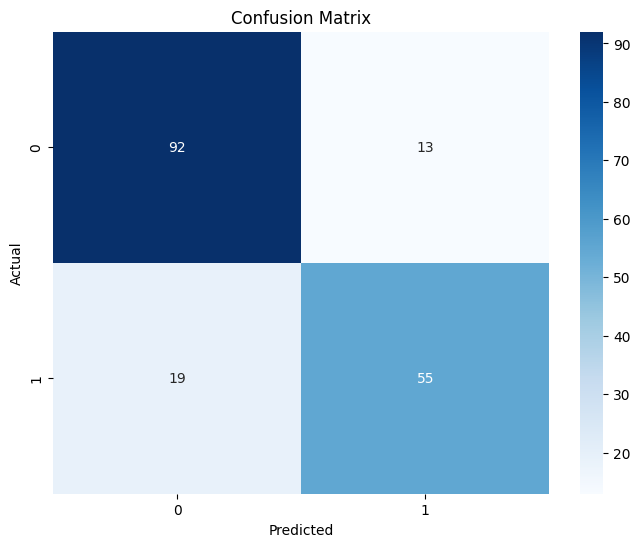

In [17]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<ipython-input-18-acbe0c5ebc70>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='viridis')


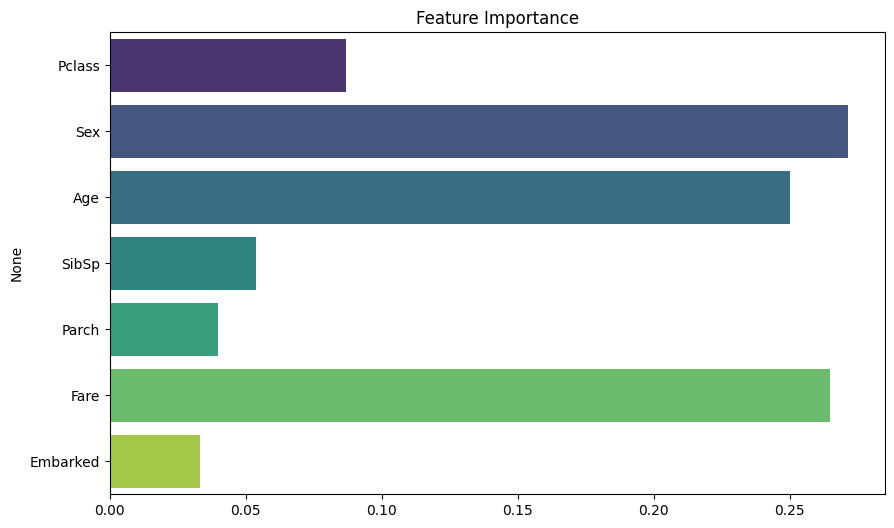

In [18]:
# Feature Importance
importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title("Feature Importance")
plt.show()

In [19]:
# Predict survival for the test dataset
test_predictions = model.predict(X_test)

In [20]:
# Add predictions to the test dataset
results = X_test.copy()
results['Predicted_Survival'] = test_predictions
results['Predicted_Survival'] = results['Predicted_Survival'].map({0: 'Did Not Survive', 1: 'Survived'})

In [21]:
# Display a sample of the predictions
print("\nSample predictions:")
print(results.head(10))


Sample predictions:
     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked Predicted_Survival
709       3    1  28.0      1      1  15.2458         0    Did Not Survive
439       2    1  31.0      0      0  10.5000         2    Did Not Survive
840       3    1  20.0      0      0   7.9250         2    Did Not Survive
720       2    0   6.0      0      1  33.0000         2           Survived
39        3    0  14.0      1      0  11.2417         0    Did Not Survive
290       1    0  26.0      0      0  78.8500         2           Survived
300       3    0  28.0      0      0   7.7500         1           Survived
333       3    1  16.0      2      0  18.0000         2    Did Not Survive
208       3    0  16.0      0      0   7.7500         1           Survived
136       1    0  19.0      0      2  26.2833         2           Survived


<ipython-input-22-34b720a9e0a5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Predicted_Survival', data=results, palette='coolwarm')


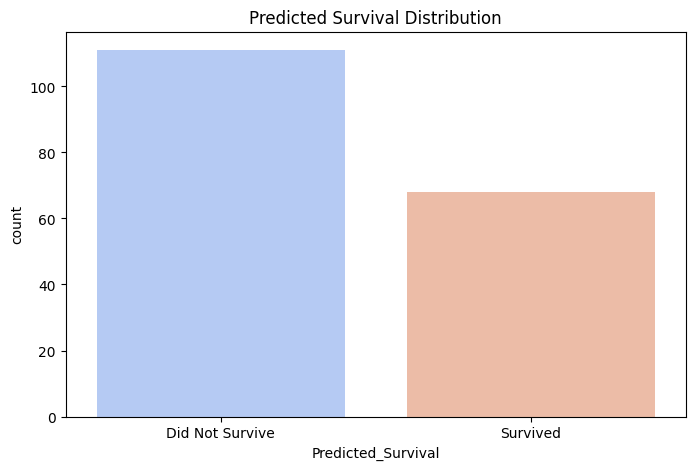

In [22]:
# Visualize the predicted survival distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Predicted_Survival', data=results, palette='coolwarm')
plt.title("Predicted Survival Distribution")
plt.show()